# CNN Model for Leukemia Image Detection
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

In [9]:
#imports 

import pandas as pd 
import numpy as np
import imageio as im
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from tensorflow.keras import layers

# 1.1 Data Exploration

---

In [2]:
os.listdir("../raw_data/C-NMC_Leukemia")

['training_data', 'testing_data', 'validation_data']

In [3]:
os.listdir("../raw_data/C-NMC_Leukemia/training_data/fold_0/all")

['UID_20_1_1_all.bmp',
 'UID_4_4_2_all.bmp',
 'UID_45_30_2_all.bmp',
 'UID_28_2_3_all.bmp',
 'UID_35_8_7_all.bmp',
 'UID_45_25_8_all.bmp',
 'UID_52_15_8_all.bmp',
 'UID_22_10_5_all.bmp',
 'UID_4_35_3_all.bmp',
 'UID_28_15_2_all.bmp',
 'UID_35_3_10_all.bmp',
 'UID_35_12_7_all.bmp',
 'UID_52_17_13_all.bmp',
 'UID_22_35_3_all.bmp',
 'UID_11_36_2_all.bmp',
 'UID_52_17_6_all.bmp',
 'UID_52_33_10_all.bmp',
 'UID_50_12_6_all.bmp',
 'UID_45_27_6_all.bmp',
 'UID_50_20_4_all.bmp',
 'UID_45_15_4_all.bmp',
 'UID_52_20_13_all.bmp',
 'UID_52_25_4_all.bmp',
 'UID_45_33_10_all.bmp',
 'UID_4_8_1_all.bmp',
 'UID_52_5_3_all.bmp',
 'UID_35_4_4_all.bmp',
 'UID_48_35_5_all.bmp',
 'UID_14_16_4_all.bmp',
 'UID_26_6_9_all.bmp',
 'UID_50_1_1_all.bmp',
 'UID_17_30_2_all.bmp',
 'UID_5_28_4_all.bmp',
 'UID_26_36_3_all.bmp',
 'UID_48_10_3_all.bmp',
 'UID_48_4_3_all.bmp',
 'UID_52_29_7_all.bmp',
 'UID_43_1_2_all.bmp',
 'UID_26_4_7_all.bmp',
 'UID_48_22_1_all.bmp',
 'UID_48_36_1_all.bmp',
 'UID_50_2_5_all.bmp',
 'UID

In [4]:
im1 = mpimg.imread("../raw_data/C-NMC_Leukemia/training_data/fold_0/hem/UID_H15_13_3_hem.bmp")
im2 = mpimg.imread("../raw_data/C-NMC_Leukemia/training_data/fold_0/all/UID_4_4_2_all.bmp")

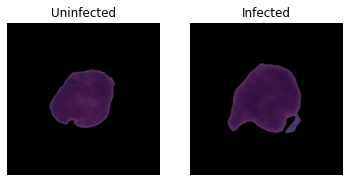

In [5]:
plt.subplot(1,2,1)
plt.imshow(im1)
plt.axis("off")
plt.title("Uninfected");
plt.subplot(1,2,2)
plt.imshow(im2)
plt.axis("off")
plt.title("Infected");

As you can see, its not that easy anymore, to clearly identify infected and uninfected cells at a glance

In [6]:
im1.shape

(450, 450, 3)

## 1.1.1 Further Exploration with Subset

In [11]:
infected = os.listdir("../raw_data/C-NMC_Leukemia/training_data/fold_2/all/")
uninfected = os.listdir("../raw_data/C-NMC_Leukemia/training_data/fold_2/hem/")

In [12]:
print(len(infected))
print("+---+")
print(len(uninfected))
print("+---+")
print(f"Ratio:{len(infected)/len(uninfected)}")

2457
+---+
1096
+---+
Ratio:2.241788321167883


**Imbalanced dataset!**

# 1.2 Data Creation and Splitting

---
Starting with only 1 Fold

In [15]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data_path = "../raw_data/C-NMC_Leukemia/training_data/fold_0/"
batch_size = 16
height = 128
width = 128

data_train = image_dataset_from_directory(raw_data_path, batch_size=batch_size,image_size=(height, width), seed=42)

Found 3527 files belonging to 2 classes.


In [18]:
class_names = data_train.class_names

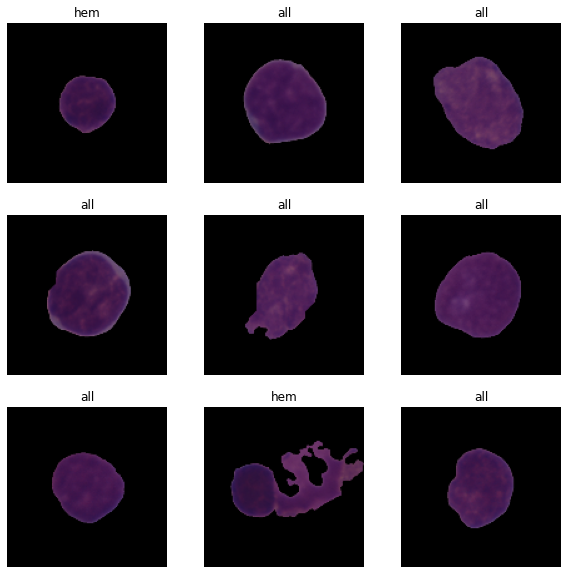

In [19]:
plt.figure(figsize=(10, 10))
for images, labels in data_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [16]:
val_df = pd.read_csv("../raw_data/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv")

In [17]:
val_df

,Patient_ID,new_names,labels
0,UID_57_29_1_all.bmp,1.bmp,1
1,UID_57_22_2_all.bmp,2.bmp,1
2,UID_57_31_3_all.bmp,3.bmp,1
3,UID_H49_35_1_hem.bmp,4.bmp,0
4,UID_58_6_13_all.bmp,5.bmp,1
...,...,...,...
1862,UID_54_33_1_all.bmp,1863.bmp,1
1863,UID_55_24_1_all.bmp,1864.bmp,1
1864,UID_H32_20_1_hem.bmp,1865.bmp,0
1865,UID_54_30_2_all.bmp,1866.bmp,1


In [22]:
val_df_all = val_df[val_df.labels == 1]
val_df_all

,Patient_ID,new_names,labels
0,UID_57_29_1_all.bmp,1.bmp,1
1,UID_57_22_2_all.bmp,2.bmp,1
2,UID_57_31_3_all.bmp,3.bmp,1
4,UID_58_6_13_all.bmp,5.bmp,1
5,UID_57_8_11_all.bmp,6.bmp,1
...,...,...,...
1861,UID_66_35_2_all.bmp,1862.bmp,1
1862,UID_54_33_1_all.bmp,1863.bmp,1
1863,UID_55_24_1_all.bmp,1864.bmp,1
1865,UID_54_30_2_all.bmp,1866.bmp,1
